Coefficients: 
 [-1.40203785e-05  4.79097861e-02  7.57114312e-06  4.41748908e-02
  1.81836284e-06  1.48519781e-01 -9.11380029e-04 -7.94531340e-07
 -2.50281148e-02  5.23403855e-02  6.27266427e+01 -3.25099853e-02
 -1.69510469e-02  4.88465875e-01 -9.85729919e-05 -1.15207923e-02
 -1.33161557e-08  7.24353506e-04  1.27256992e-03 -1.08179122e-04
  9.29638558e-06 -1.16260898e-05  4.85398437e-06]
Mean squared error: 0.04408440462232076
Coefficient of determination: 0.0026960181603655764


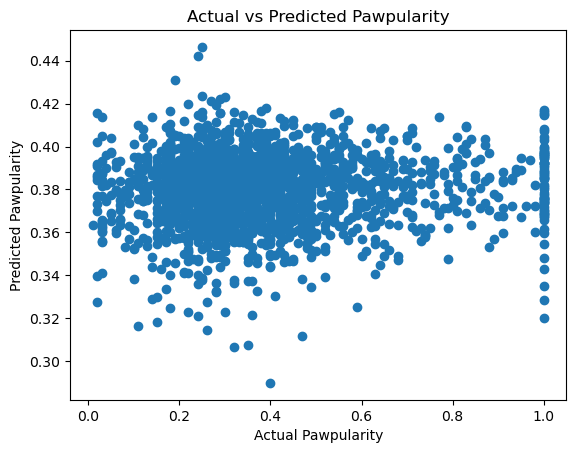

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


train_image_data = pd.read_csv('features.csv')
# Train a regression model using the top five antecedents and the Pawpularity variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Get the training data of all features
X = train_image_data[['gabor_mean','haralick_0','haralick_1','haralick_2', 'haralick_3','haralick_4','haralick_5','haralick_6','haralick_7','haralick_8','haralick_9','haralick_10','haralick_11','haralick_12','saturation','lbp_mean','total_entropy','mean_red','mean_green','mean_blue','variance_red','variance_green','variance_blue']]
y = train_image_data['Pawpularity_normalized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get the model performance metrics
print('Coefficients: \n', model.coef_)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()


Combination of 7 features

In [37]:
# Train a regression model using the top five antecedents and the Pawpularity variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE


# Select specific features from the dataset

X = train_image_data.iloc[:, 1:-2]#except the last two and the first(Id)
y = train_image_data['Pawpularity_normalized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = LinearRegression()
rfe=RFE(model,n_features_to_select=7)
x_rfe=rfe.fit_transform(X_train,y_train)



Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_4', 'haralick_6', 'haralick_9',
       'haralick_11', 'haralick_12'],
      dtype='object')
Coefficients: [ 8.63115060e+07 -3.45246024e+08 -2.39220284e-01  8.63115060e+07
  5.31776227e+01 -3.23815076e-01  5.91053144e-01]
Mean Squared Error: 0.04422307420256389
Coefficient of determination: R^2:-0.00044104869403138736


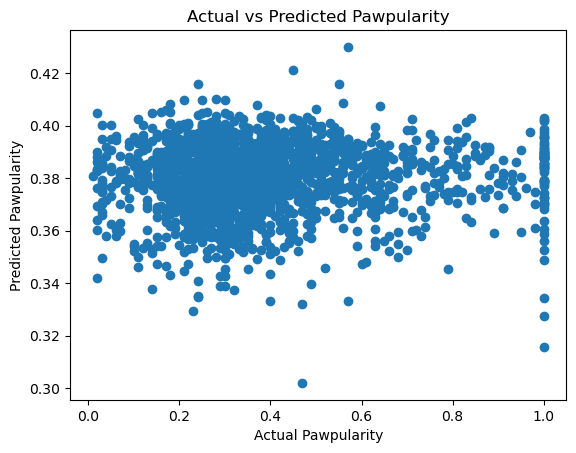

In [39]:
#get the selected features
selected_features = X.columns[rfe.support_]
model.fit(X_train[selected_features], y_train)
# Make predictions
y_pred = model.predict(X_test[selected_features])
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)

# Coeficiente de Determinação (R^2)
r2 = r2_score(y_test, y_pred)
    # Store the model if the metric is better

    
# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print(f"Mean Squared Error: {mse}")
print(f"Coefficient of determination: R^2:{r2}")  

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()


10 features

Selected Features: Index(['haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_6',
       'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12'],
      dtype='object')
Coefficients: [ 1.46040671e+08  4.04589916e-02 -5.84162683e+08  4.27571544e-02
  1.46040671e+08  1.23310007e-02  1.99275573e-02  1.14002029e+02
 -7.27465136e-02  1.99304093e-01]
Mean Squared Error: 0.04429435552489242
Coefficient of determination: R^2:-0.0020536177464678396


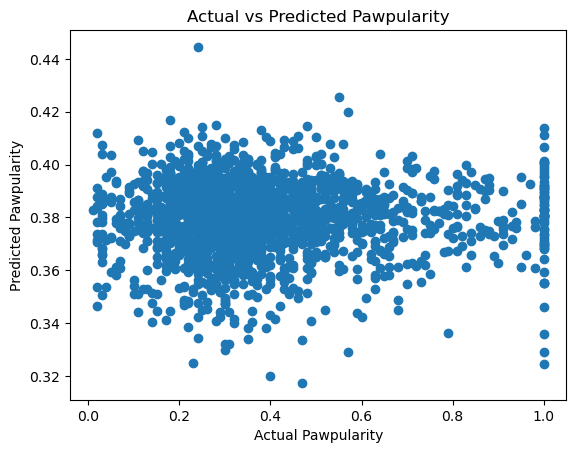

In [40]:
# Train a regression model using the top five antecedents and the Pawpularity variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE


# Select specific features from the dataset

X = train_image_data.iloc[:, 1:-2]#except the last two and the first(Id)
y = train_image_data['Pawpularity_normalized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = LinearRegression()
rfe=RFE(model,n_features_to_select=10)
x_rfe=rfe.fit_transform(X_train,y_train)

#get the selected features
selected_features = X.columns[rfe.support_]
model.fit(X_train[selected_features], y_train)
# Make predictions
y_pred = model.predict(X_test[selected_features])
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)

# Coeficiente de Determinação (R^2)
r2 = r2_score(y_test, y_pred)
    # Store the model if the metric is better

    
# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print(f"Mean Squared Error: {mse}")
print(f"Coefficient of determination: R^2:{r2}")  

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()


12

Selected Features: Index(['haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_6',
       'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11',
       'haralick_12', 'lbp_mean'],
      dtype='object')
Coefficients: [ 1.23818811e+08  4.82809346e-02 -4.95275243e+08  1.56397744e-01
  1.23818811e+08 -4.91853238e-02  6.68460323e-02  5.16186743e+01
 -3.15050972e-02 -1.67351341e-01  4.04842883e-01 -6.57183609e-03]
Mean Squared Error: 0.04424346317581944
Coefficient of determination: R^2:-0.0009023003404489138


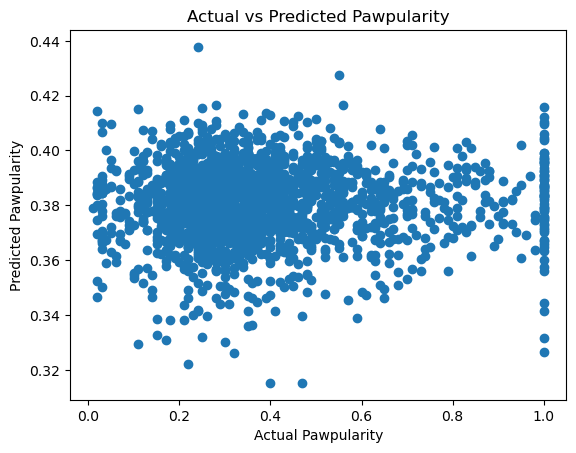

In [41]:
# Train a regression model using the top five antecedents and the Pawpularity variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE


# Select specific features from the dataset

X = train_image_data.iloc[:, 1:-2]#except the last two and the first(Id)
y = train_image_data['Pawpularity_normalized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = LinearRegression()
rfe=RFE(model,n_features_to_select=12)
x_rfe=rfe.fit_transform(X_train,y_train)

#get the selected features
selected_features = X.columns[rfe.support_]
model.fit(X_train[selected_features], y_train)
# Make predictions
y_pred = model.predict(X_test[selected_features])
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)

# Coeficiente de Determinação (R^2)
r2 = r2_score(y_test, y_pred)
    # Store the model if the metric is better

    
# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print(f"Mean Squared Error: {mse}")
print(f"Coefficient of determination: R^2:{r2}")  

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()


Selected Features: Index(['haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4',
       'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9',
       'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green'],
      dtype='object')
Coefficients: [ 1.62106987e-02  1.57185498e+08  5.05034702e-02 -6.28741994e+08
  1.82950915e-01  1.09301436e-05  1.57185498e+08 -4.73595316e-02
  7.01088254e-02  6.03872146e+01 -3.38414217e-02 -1.10522282e-01
  4.56989561e-01 -4.97609532e-03  1.00346929e-04]
Mean Squared Error: 0.04420564941289352
Coefficient of determination: R^2:-4.685459591780017e-05


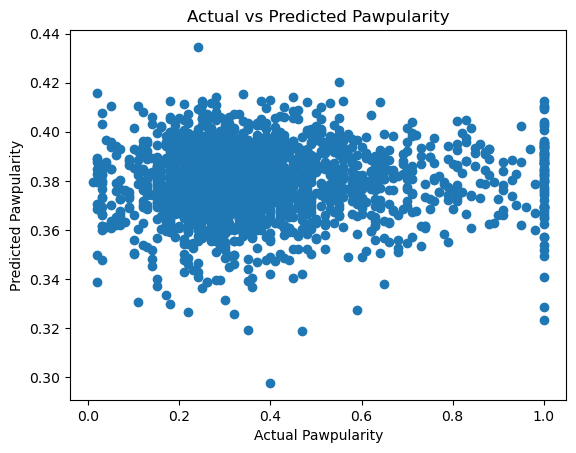

In [42]:
# Train a regression model using the top five antecedents and the Pawpularity variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE


# Select specific features from the dataset

X = train_image_data.iloc[:, 1:-2]#except the last two and the first(Id)
y = train_image_data['Pawpularity_normalized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = LinearRegression()
rfe=RFE(model,n_features_to_select=15)
x_rfe=rfe.fit_transform(X_train,y_train)

#get the selected features
selected_features = X.columns[rfe.support_]
model.fit(X_train[selected_features], y_train)
# Make predictions
y_pred = model.predict(X_test[selected_features])
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)

# Coeficiente de Determinação (R^2)
r2 = r2_score(y_test, y_pred)
    # Store the model if the metric is better

    
# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print(f"Mean Squared Error: {mse}")
print(f"Coefficient of determination: R^2:{r2}")  

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()


Mean Squared Error: 0.08733993948562783
Coefficient of determination (R^2): -0.9758567722279443


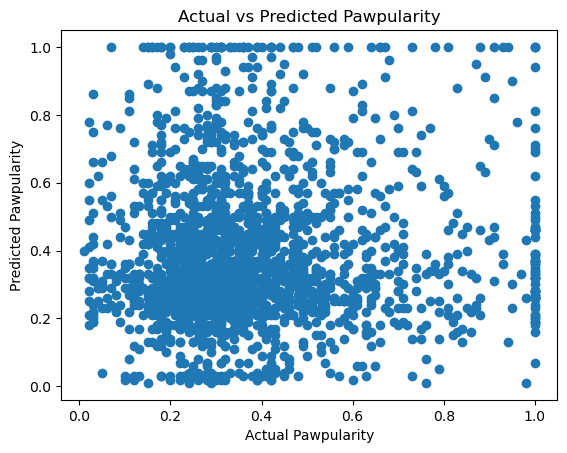

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Select specific features from the dataset
X = train_image_data.iloc[:, 1:-2]  # Excluir a primeira coluna e as duas últimas colunas
y = train_image_data['Pawpularity_normalized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeRegressor()

# Treinar o modelo com as features selecionadas
model.fit(X_train, y_train)

# Fazer predições
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)

# Coeficiente de Determinação (R^2)
r2 = r2_score(y_test, y_pred)

# Exibir as métricas do melhor modelo

print(f"Mean Squared Error: {mse}")
print(f"Coefficient of determination (R^2): {r2}")

# Plotar as predições em relação aos valores reais
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()


svr

Mean Squared Error: 0.044813900225201674
Coefficient of determination (R^2): -0.013807071213768563


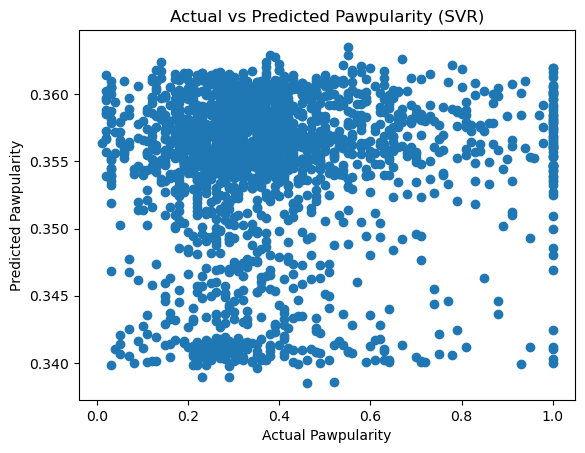

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select specific features from the dataset
X = train_image_data.iloc[:, 1:-2]  # Exclude the first column and the last two columns
y = train_image_data['Pawpularity_normalized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVR model
svr_model = SVR()

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate the performance of the SVR model
mse = mean_squared_error(y_test, y_pred)

# Coefficient of Determination (R^2)
r2 = r2_score(y_test, y_pred)

# Display the metrics of the SVR model
print(f"Mean Squared Error: {mse}")
print(f"Coefficient of determination (R^2): {r2}")

# Plot the predictions in relation to the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity (SVR)')
plt.show()


In [4]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Select specific features from the dataset
X = train_image_data.iloc[:, 1:-2]  # Exclude the first column and the last two columns
y = train_image_data['Pawpularity_normalized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for SVR
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear']}

# Create an SVR model
svr_model = SVR()

# Perform grid search with cross-validation
grid = GridSearchCV(svr_model, param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid.best_params_
best_estimator = grid.best_estimator_

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Coefficient of determination (R^2): {r2}")

# Plot actual vs predicted Pawpularity
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.005 total time=   4.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   4.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   3.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.002 total time=   4.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.005 total time=   4.2s


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
# Select specific features from the dataset
X = train_image_data.iloc[:, 1:-2]  # Exclude the first column and the last two columns
y = train_image_data['Pawpularity_normalized']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Create SVR model
svr_model = SVR()

# Create StandardScaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear']}

# Perform grid search on scaled data
grid = GridSearchCV(svr_model, param_grid, cv=5, verbose=3)
grid.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.018 total time=   2.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.007 total time=   2.7s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   2.7s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.014 total time=   2.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.020 total time=   2.6s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.018 total time=   2.6s
[CV 2/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.010 total time=   2.5s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.005 total time=   2.8s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.021 total time=   2.7s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.023 total time=   3.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.035 total time=   2.5s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;,

In [11]:
best_params, best_estimator

({'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}, SVR(C=0.1, gamma=1))

In [12]:
# Make predictions
y_pred = best_estimator.predict(X_train)

# Get the model performance metrics
print('Mean squared error: %.7f' % mean_squared_error(y_train, y_pred))
print('Coefficient of determination: %.7f' % r2_score(y_train, y_pred))



c:\Users\Leonor Moura\miniconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


Mean squared error: 0.0420024
Coefficient of determination: -0.0013129


decison tree grid

In [2]:
# Create a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

best_params, best_estimator

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.003 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.004 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.011 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.002 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.005 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=0.003 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.004 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.011 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=0.002 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_lea

({'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 4},
 DecisionTreeRegressor(max_depth=2, min_samples_leaf=4, min_samples_split=4))

In [6]:
# Make predictions with the best estimator
y_pred = best_estimator.predict(X_train)

# Get the model performance metrics
print('Mean squared error: %.5f' % mean_squared_error(y_train, y_pred))
print('Coefficient of determination: %.5f' % r2_score(y_train, y_pred))

Mean squared error: 0.04160
Coefficient of determination: 0.00836
